ejercicio 1.
Genera una imagen semejante a un tablero de ajedrez tomando en cuenta que cada
casilla debe medir 100x100 px como se muestra en la imagen a continuación (toma en
cuenta la saturación de los colores)

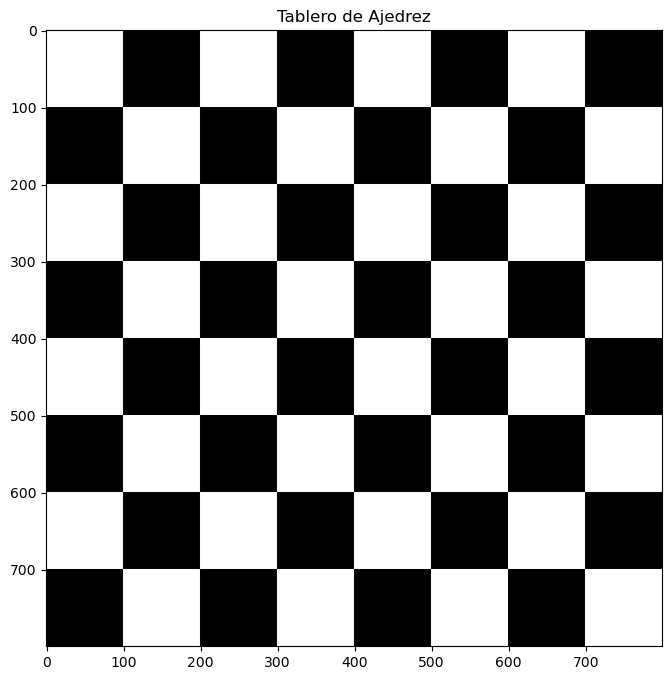

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensiones del tablero de ajedrez (8x8)
filas = 8
columnas = 8
tamano_casilla = 100  # Tamaño de cada casilla en píxeles

# Crear una matriz para representar el tablero de ajedrez
tablero = np.zeros((filas * tamano_casilla, columnas * tamano_casilla), dtype=np.uint8)

# Alternar entre blanco y negro para las casillas
for fila in range(filas):
    for columna in range(columnas):
        if (fila + columna) % 2 == 0:
            tablero[fila * tamano_casilla: (fila + 1) * tamano_casilla,
                    columna * tamano_casilla: (columna + 1) * tamano_casilla] = 255  # Blanco
        else:
            tablero[fila * tamano_casilla: (fila + 1) * tamano_casilla,
                    columna * tamano_casilla: (columna + 1) * tamano_casilla] = 0  # Negro

# Mostrar la imagen del tablero de ajedrez
plt.figure(figsize=(8, 8))
plt.imshow(tablero, cmap='gray')  # Usar colormap 'gray' para mostrar en blanco y negro
plt.title('Tablero de Ajedrez')
plt.show()

ejercicio 2

Tomando en cuenta la imagen2.jpg aplica un degradado lineal en ella.


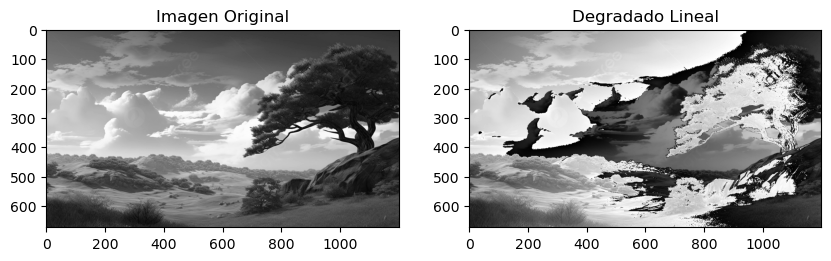

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_original = cv2.imread('mascara.jpeg', cv2.IMREAD_GRAYSCALE)
alto, ancho = imagen_original.shape

gradiente = np.zeros((alto, ancho), dtype=np.uint8)
for y in range(alto):
    for x in range(ancho):
        gradiente[y, x] = int(255 * x / ancho)

imagen_con_degradado = imagen_original + gradiente

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_original, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_con_degradado, cmap='gray')
plt.title('Degradado Lineal')

plt.show()

ejercicio 3
En la imagen1.jpg aplica una mascara triangular como se ve en la imagen.

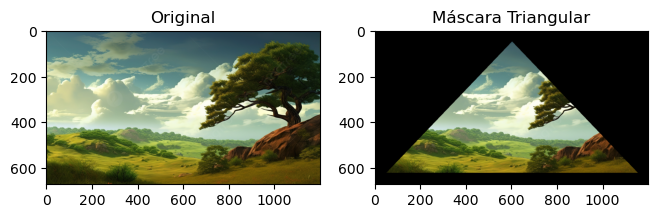

In [14]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mascara.jpeg')

alto, ancho = img.shape[:2]

mascara = np.zeros_like(img)

vertices = np.array([[ancho//2, 50], [ancho-50, alto-50], [50, alto-50]])
cv2.drawContours(mascara, [vertices], 0, (255, 255, 255), -1)

img_con_mascara = cv2.bitwise_and(img, mascara)

plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_con_mascara, cv2.COLOR_BGR2RGB))
plt.title('Máscara Triangular')

plt.show()

Ejercicio 4.
Tomando en cuenta la imagen2.jpg elige un punto de interés al azar, genera su histograma
por canales, solariza y posteriza la imagen, realiza un tratamiento de umbralización(el de
preferencia), guarda todas las imágenes resultantes con sus correspondientes nombres y
muéstralas con jupyter

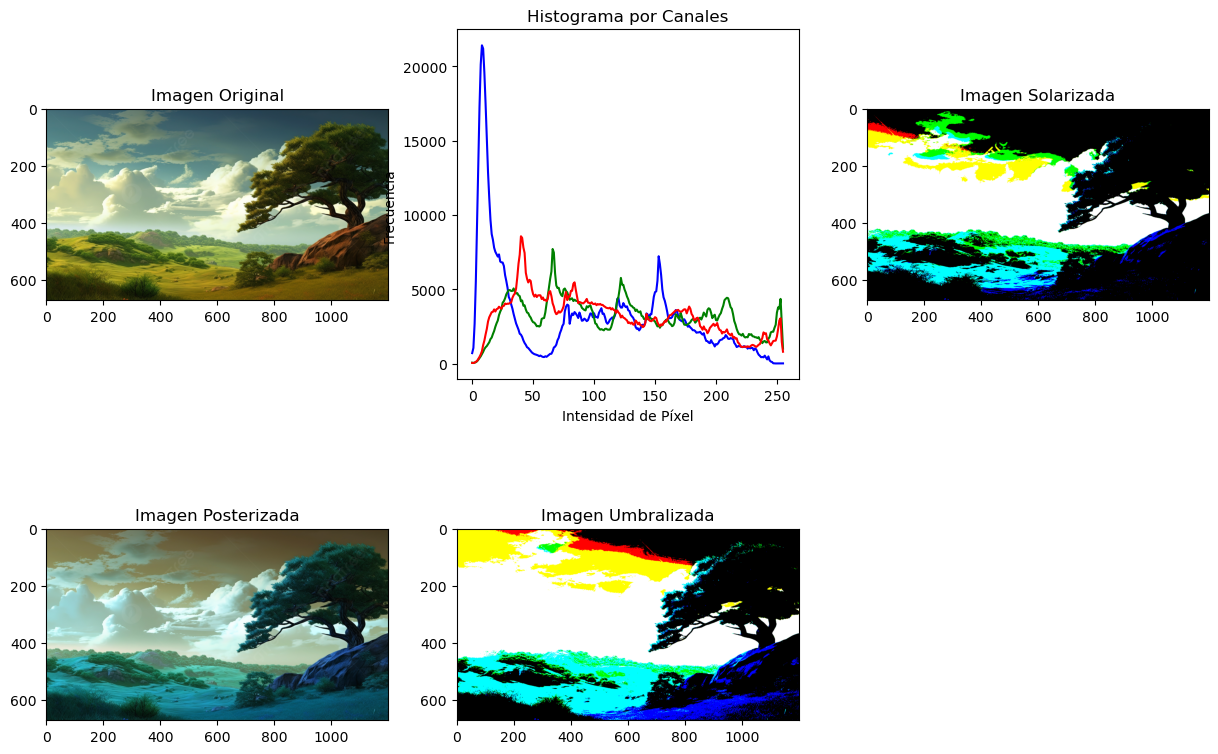

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


imagen = cv2.imread('mascara.jpeg')


punto_interes = (150, 200)  

b, g, r = cv2.split(imagen)
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])


umbral = 127
imagen_solarizada = cv2.threshold(imagen, umbral, 255, cv2.THRESH_BINARY)[1]

num_segmentos = 4
imagen_posterizada = cv2.addWeighted(imagen, 1, (num_segmentos - 1) * (1.0 / num_segmentos), 0, 0)


umbralizacion = cv2.threshold(imagen, 100, 255, cv2.THRESH_BINARY)[1]


cv2.imwrite('imagen_solarizada.jpg', imagen_solarizada)
cv2.imwrite('imagen_posterizada.jpg', imagen_posterizada)
cv2.imwrite('imagen_umbralizacion.jpg', umbralizacion)


plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title('imagen original')

plt.subplot(2, 3, 2)
plt.plot(hist_b, color='b')
plt.plot(hist_g, color='g')
plt.plot(hist_r, color='r')
plt.title('histograma por canales')
plt.xlabel('intensidad de pixel')
plt.ylabel('frecuencia')

plt.subplot(2, 3, 3)
plt.imshow(imagen_solarizada, cmap='gray')
plt.title('imagen solarizada')

plt.subplot(2, 3, 4)
plt.imshow(imagen_posterizada)
plt.title('imagen posterizada')

plt.subplot(2, 3, 5)
plt.imshow(umbralizacion, cmap='gray')
plt.title('imagen umbralizada')


plt.show()

Teoría:
¿A que nos referimos si hablamos de una imagen digital?
Una imagen digital es una representación visual de una imagen en forma de píxeles, donde cada píxel tiene un valor numérico que define su color y posición en la imagen. Las imágenes digitales se componen de una cuadrícula de píxeles, y la resolución de la imagen se determina por la cantidad de pixeles presentes en la imagen.

¿Qué es la profundidad del color ?

La profundidad del color se refiere a la cantidad de información de color que se puede representar en cada píxel de una imagen. Se mide en bits y determina la cantidad de colores diferentes que se pueden mostrar en una imagen. Por ejemplo, una profundidad de color de 8 bits por canal en una imagen RGB permite representar 256 tonos de color (2^8 = 256) para cada canal (rojo, verde, azul). 

¿Cuál es la diferencia entre CMKY y RGB?

 La diferencia principal entre CMYK y RGB radica en los modelos de color que utilizan: 
   - CMYK (Cian, Magenta, Amarillo, Negro) es un modelo de color sustractivo utilizado principalmente en la impresion. En este modelo, los colores se forman al sustraer diferentes cantidades de cian, magenta, amarillo y negro. 
   - RGB (Rojo, Verde, Azul) es un modelo de color aditivo utilizado en dispositivos electrónicos como monitores y pantallas. En este modelo, los colores se generan combinando diferentes cantidades de rojo, verde y azul para producir una amplia gama de colores.  
 